<a href="https://colab.research.google.com/github/vitalfocheux/Projet_Init_SAW/blob/main/python/draw_path.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloads and Imports

In [1]:
!pip install ipyturtle3

import random
import matplotlib.pyplot as plt
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.8 MB/s eta 0:00:00


# Random creation of a self avoiding_path

In [6]:
def generate_self_avoiding_path(length):
    directions = []
    visited = set()
    x, y = 0, 0
    visited.add((x, y))

    for _ in range(length):
        possible_moves = []
        if (x, y + 1) not in visited:  # North
            possible_moves.append('n')
        if (x, y - 1) not in visited:  # South
            possible_moves.append('s')
        if (x + 1, y) not in visited:  # East
            possible_moves.append('e')
        if (x - 1, y) not in visited:  # West
            possible_moves.append('w')

        if not possible_moves:
            break  # No more moves available

        move = random.choice(possible_moves)
        directions.append(move)

        if move == 'n':
            y += 1
        elif move == 's':
            y -= 1
        elif move == 'e':
            x += 1
        elif move == 'w':
            x -= 1

        visited.add((x, y))

    return directions

# Générer un chemin auto-évitant de longueur 20
path = generate_self_avoiding_path(2000)
print(path)

['s', 'e', 's', 's', 'w', 'w', 'n', 'w', 'n', 'e', 'n', 'n', 'w', 'w', 'w', 'n', 'e', 'e', 'n', 'n', 'e', 'e', 'e', 'n', 'e', 's', 's', 'w', 'w', 's', 'w', 'n']


# print a self avoiding path

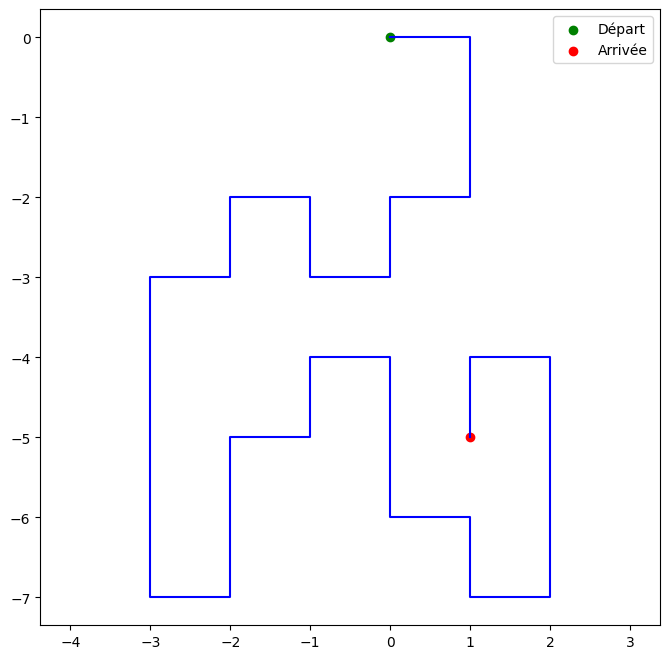

In [7]:
# Fonction pour convertir une liste de lettres en directions pour le chemin
def letters_to_direction(letters):
    directions = []
    for letter in letters:
        if letter == 'n':
            directions.append(0)
        elif letter == 's':
            directions.append(180)
        elif letter == 'e':
            directions.append(90)
        elif letter == 'w':
            directions.append(270)
    return directions

# Fonction pour dessiner le chemin
def draw_path(directions):
    x, y = 0, 0
    x_coords, y_coords = [x], [y]

    for direction in directions:
        if direction == 0:  # Nord
            y += 1
        elif direction == 180:  # Sud
            y -= 1
        elif direction == 90:  # Est
            x += 1
        elif direction == 270:  # Ouest
            x -= 1

        x_coords.append(x)
        y_coords.append(y)

    plt.figure(figsize=(8, 8))
    plt.plot(x_coords, y_coords, 'b-')
    plt.scatter(x_coords[0], y_coords[0], color='green', label='Départ')
    plt.scatter(x_coords[-1], y_coords[-1], color='red', label='Arrivée')
    plt.legend()
    plt.axis('equal')  # Pour que les axes soient égaux
    plt.show()

# Fonction principale
def main():
    # Liste de lettres
    ## letters = generate_self_avoiding_path(2000)
    letters = ['e', 's', 's', 'w', 's', 'w', 'n', 'w', 's', 'w', 's', 's', 's', 's', 'e', 'n', 'n', 'e', 'n', 'e', 's', 's', 'e', 's', 'e', 'n', 'n', 'n', 'w', 's']

    # Convertir les lettres en directions
    directions = letters_to_direction(letters)

    # Dessiner le chemin
    draw_path(directions)

# Exécuter la fonction principale
main()